<a href="https://colab.research.google.com/github/linyuehzzz/census_privacy/blob/main/guernsey_data_census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


####**Add GEOID10 (block)**

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd
filename = 'guernsey/sf1/guernsey_P12G.csv'
data = pd.read_csv(filename)
data['STATE'] = data['STATE'].apply('{:0>2}'.format)
data['COUNTY'] = data['COUNTY'].apply('{:0>3}'.format)
data['TRACT'] = data['TRACT'].apply('{:0>6}'.format)
data['BLOCK'] = data['BLOCK'].apply('{:0>4}'.format)
data['GEOID10'] = data[['STATE', 'COUNTY', 'TRACT', 'BLOCK']].apply(lambda x: ''.join(x), axis=1)

data.to_csv(filename, index=False)
data.head()

/content/gdrive/My Drive/Colab Notebooks/census_privacy


,FILEID,STUSAB,SUMLEV,LOGRECNO,REGION,DIVISION,STATE,COUNTY,TRACT,BLOCK,P012G001,P012G002,P012G003,P012G004,P012G005,P012G006,P012G007,P012G008,P012G009,P012G010,P012G011,P012G012,P012G013,P012G014,P012G015,P012G016,P012G017,P012G018,P012G019,P012G020,P012G021,P012G022,P012G023,P012G024,P012G025,P012G026,P012G027,P012G028,P012G029,P012G030,P012G031,P012G032,P012G033,P012G034,P012G035,P012G036,P012G037,P012G038,P012G039,P012G040,P012G041,P012G042,P012G043,P012G044,P012G045,P012G046,P012G047,P012G048,P012G049,GEOID10
0,SF1ST,OH,101,147755,2,3,39,059,977200,3104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,390599772003104
1,SF1ST,OH,101,147756,2,3,39,059,977200,3105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,390599772003105
2,SF1ST,OH,101,147757,2,3,39,059,977200,3106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,390599772003106
3,SF1ST,OH,101,147758,2,3,39,059,977200,3107,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,390599772003107
4,SF1ST,OH,101,147759,2,3,39,059,977200,3111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,390599772003111


####**Constraint variables (block + race + sex + age)**

P012A - G in SF1

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd
import numpy as np
import csv

tl = ["A", "B", "C", "D", "E", "F", "G"]
for a in tl:
    input = "guernsey/sf1/guernsey_P12" + a + ".csv"
    data = pd.read_csv(input)
    table = "P012" + a
    race = tl.index(a) + 1

    for sex in [1, 2]:
        o_id = (race - 1) * 2 + sex
        output = "guernsey/microdata/by_race/guernsey_md" + str(o_id) + ".csv"

        # male: table + "003" - table + "025"
        # female: table + "027" - table + "049"
        start = 3 if sex == 1 else 27    # 3 or 27

        with open(output, 'w', newline='') as csvfile:
            writer = csv.writer(csvfile, delimiter=',')
            writer.writerow(["GEOID10", "race", "sex", "age", "age_v"])
            for index, row in data.iterrows():
                GEOID10 = row["GEOID10"]
                # print(GEOID10)
                for k in range(start, start + 23):
                    age = k - 2 if sex == 1 else k - 26
                    col_name = table + str(k).zfill(3)
                    cnt = row[col_name]
                    for i in range(cnt):
                        if age == 1:
                            age_v = np.random.randint(0, 4, size=1)[0]
                        elif age == 2:
                            age_v = np.random.randint(5, 9, size=1)[0]
                        elif age == 3:
                            age_v = np.random.randint(10, 14, size=1)[0]
                        elif age == 4:
                            age_v = np.random.randint(15, 17, size=1)[0]
                        elif age == 5:
                            age_v = np.random.randint(18, 19, size=1)[0]
                        elif age == 6:
                            age_v = 20
                        elif age == 7:
                            age_v = 21
                        elif age == 8:
                            age_v = np.random.randint(22, 24, size=1)[0]
                        elif age == 9:
                            age_v = np.random.randint(25, 29, size=1)[0]
                        elif age == 10:
                            age_v = np.random.randint(30, 34, size=1)[0]
                        elif age == 11:
                            age_v = np.random.randint(35, 39, size=1)[0]
                        elif age == 12:
                            age_v = np.random.randint(40, 44, size=1)[0]
                        elif age == 13:
                            age_v = np.random.randint(45, 49, size=1)[0]
                        elif age == 14:
                            age_v = np.random.randint(50, 54, size=1)[0]
                        elif age == 15:
                            age_v = np.random.randint(55, 59, size=1)[0]
                        elif age == 16:
                            age_v = np.random.randint(60, 61, size=1)[0]
                        elif age == 17:
                            age_v = np.random.randint(62, 64, size=1)[0]
                        elif age == 18:
                            age_v = np.random.randint(65, 66, size=1)[0]
                        elif age == 19:
                            age_v = np.random.randint(67, 69, size=1)[0]
                        elif age == 20:
                            age_v = np.random.randint(70, 74, size=1)[0]
                        elif age == 21:
                            age_v = np.random.randint(75, 79, size=1)[0]
                        elif age == 22:
                            age_v = np.random.randint(80, 84, size=1)[0]
                        else:
                            age_v = np.random.randint(85, 100, size=1)[0]
                        writer.writerow([GEOID10, race, sex, age, age_v])

/content/gdrive/My Drive/Colab Notebooks/census_privacy


In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
# merge all files into one
import pandas as pd
import glob
import os
  
joined_files = os.path.join("guernsey/microdata/by_race", "guernsey_md*.csv")
joined_list = glob.glob(joined_files)
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
df = df.sort_values(by=["GEOID10", "age"])
df.to_csv("guernsey/microdata/guernsey_people_all.csv", index=False)
df

/content/gdrive/My Drive/Colab Notebooks/census_privacy


,GEOID10,race,sex,age,age_v
16408,390599771001005,1,1,1,1
16409,390599771001005,1,1,1,1
16410,390599771001005,1,1,1,2
16411,390599771001005,1,1,1,0
16412,390599771001005,1,1,1,2
...,...,...,...,...,...
15708,390599780004097,1,1,9,26
35513,390599780004097,1,2,9,25
35514,390599780004097,1,2,13,48
15709,390599780004097,1,1,15,55


####**Extract NHGIS data in Franklin county**

In [ ]:
# block
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

filename_nhgis = 'guernsey/nhgis/nhgis_ppdd_20210608_block_OH.csv'
data_nhgis = pd.read_csv(filename_nhgis)
data_nhgis["STATE"] = data_nhgis["gisjoin"].str.slice(1, 3)
data_nhgis['COUNTY'] = data_nhgis["gisjoin"].str.slice(4, 7)
data_nhgis['TRACT'] = data_nhgis["gisjoin"].str.slice(8, 14)
data_nhgis['BLOCK'] = data_nhgis["gisjoin"].str.slice(14, 18)
data_nhgis['GEOID10'] = data_nhgis[['STATE', 'COUNTY', 'TRACT', 'BLOCK']].apply(lambda x: ''.join(x), axis=1)
data_nhgis = data_nhgis[data_nhgis["COUNTY"] == '059']
data_nhgis = data_nhgis[['GEOID10', 'H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp', 
                         'H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
data_nhgis = data_nhgis.loc[(data_nhgis[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']] != 0).any(1)]
data_nhgis.to_csv("guernsey/nhgis/guernsey_nhgis_block.csv", index=False)
data_nhgis

/content/gdrive/My Drive/Colab Notebooks/census_privacy


,GEOID10,H72003_dp,H72004_dp,H72005_dp,H72006_dp,H72007_dp,H72008_dp,H72009_dp,H72003_sf,H72004_sf,H72005_sf,H72006_sf,H72007_sf,H72008_sf,H72009_sf
132064,390599771001005,38,1,0,0,0,0,0,35,0,0,0,0,0,0
132066,390599771001007,14,0,0,0,0,0,0,9,0,0,0,0,0,0
132067,390599771001008,4,0,0,0,0,0,0,14,0,0,0,0,0,0
132069,390599771001010,20,0,0,0,0,0,0,30,0,0,0,0,0,0
132070,390599771001011,32,0,0,0,0,0,0,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135820,390599780004090,3,0,0,0,0,0,0,7,0,0,0,0,0,0
135822,390599780004092,4,0,0,0,0,0,1,2,0,0,0,0,0,0
135823,390599780004093,5,0,0,0,0,0,0,7,0,0,0,0,0,0
135826,390599780004096,3,0,0,0,0,0,1,4,0,0,0,0,0,0


/content/gdrive/My Drive/Colab Notebooks/census_privacy


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


-0.010134030728996404 1.5960770235186188


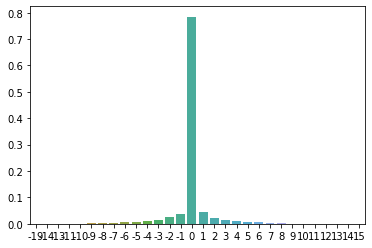

In [2]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm
import pylab as py

filename_nhgis_block = 'guernsey/nhgis/guernsey_nhgis_block.csv'
nhgis_block = pd.read_csv(filename_nhgis_block)

hist1_nhgis = nhgis_block[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
hist1_nhgis = hist1_nhgis.rename(columns={'H72003_sf': '1', 'H72004_sf': '2', 'H72005_sf': '3', 'H72006_sf': '4', 'H72007_sf': '5', 'H72008_sf': '6', 
                                          'H72009_sf': '7'})
hist2_nhgis = nhgis_block[['H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp']]
hist2_nhgis = hist2_nhgis.rename(columns={'H72003_dp': '1', 'H72004_dp': '2', 'H72005_dp': '3', 'H72006_dp': '4', 'H72007_dp': '5', 'H72008_dp': '6', 
                                          'H72009_dp': '7'})

noise = hist2_nhgis - hist1_nhgis

probabilities = noise.stack().value_counts(normalize=True)    
sns.barplot(probabilities.index, probabilities.values)

data = noise.values.ravel()
mu, std = norm.fit(data)
print(mu, std)

# sm.qqplot(data, line ='45')
# py.show()

In [ ]:
# block group
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

filename_nhgis = 'guernsey/nhgis/nhgis_ppdd_20210608_blck_grp.csv'
data_nhgis = pd.read_csv(filename_nhgis)
data_nhgis["STATE"] = data_nhgis["gisjoin"].str.slice(1, 3)
data_nhgis['COUNTY'] = data_nhgis["gisjoin"].str.slice(4, 7)
data_nhgis['TRACT'] = data_nhgis["gisjoin"].str.slice(8, 14)
data_nhgis['BG'] = data_nhgis["gisjoin"].str.slice(14, 15)
data_nhgis['GEOID10'] = data_nhgis[['STATE', 'COUNTY', 'TRACT', 'BG']].apply(lambda x: ''.join(x), axis=1)
data_nhgis = data_nhgis[(data_nhgis["STATE"] == '39') & (data_nhgis["COUNTY"] == '059')]
data_nhgis = data_nhgis[['GEOID10', 'H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp', 
                         'H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
data_nhgis = data_nhgis.loc[(data_nhgis[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']] != 0).any(1)]
data_nhgis.to_csv("guernsey/nhgis/guernsey_nhgis_bg.csv", index=False)
data_nhgis

/content/gdrive/My Drive/Colab Notebooks/census_privacy


,GEOID10,H72003_dp,H72004_dp,H72005_dp,H72006_dp,H72007_dp,H72008_dp,H72009_dp,H72003_sf,H72004_sf,H72005_sf,H72006_sf,H72007_sf,H72008_sf,H72009_sf
153757,390599771001,1150,4,0,1,0,2,14,1144,5,2,1,0,0,8
153758,390599771002,1423,4,9,3,0,0,6,1430,26,7,2,0,1,12
153759,390599771003,1129,2,4,1,0,1,19,1099,9,3,0,0,1,18
153760,390599771004,829,2,0,0,0,0,4,814,0,1,2,0,2,20
153761,390599772001,1173,3,4,2,0,0,12,1175,4,6,2,0,2,9
153762,390599772002,985,8,1,2,2,1,10,969,4,3,0,3,1,12
153763,390599772003,839,3,3,1,0,1,10,837,2,1,1,0,0,8
153764,390599772004,1727,0,3,6,0,1,26,1736,7,4,8,0,2,25
153765,390599773001,1529,36,0,12,0,1,34,1503,51,1,10,0,3,44
153766,390599773002,1200,58,2,4,0,10,58,1218,42,6,3,1,13,56


/content/gdrive/My Drive/Colab Notebooks/census_privacy


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


-0.00816326530612245 7.526276059266178


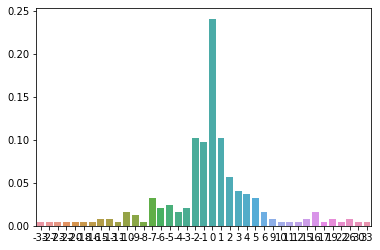

In [3]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm

filename_nhgis_block = 'guernsey/nhgis/guernsey_nhgis_bg.csv'
nhgis_block = pd.read_csv(filename_nhgis_block)

hist1_nhgis = nhgis_block[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
hist1_nhgis = hist1_nhgis.rename(columns={'H72003_sf': '1', 'H72004_sf': '2', 'H72005_sf': '3', 'H72006_sf': '4', 'H72007_sf': '5', 'H72008_sf': '6', 
                                          'H72009_sf': '7'})
hist2_nhgis = nhgis_block[['H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp']]
hist2_nhgis = hist2_nhgis.rename(columns={'H72003_dp': '1', 'H72004_dp': '2', 'H72005_dp': '3', 'H72006_dp': '4', 'H72007_dp': '5', 'H72008_dp': '6', 
                                          'H72009_dp': '7'})

noise = hist2_nhgis - hist1_nhgis

probabilities = noise.stack().value_counts(normalize=True)    
sns.barplot(probabilities.index, probabilities.values)

data = noise.values.ravel()
mu, std = norm.fit(data)
print(mu, std)

In [ ]:
# tract
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

filename_nhgis = 'guernsey/nhgis/nhgis_ppdd_20210608_tract.csv'
data_nhgis = pd.read_csv(filename_nhgis)
data_nhgis["STATE"] = data_nhgis["gisjoin"].str.slice(1, 3)
data_nhgis['COUNTY'] = data_nhgis["gisjoin"].str.slice(4, 7)
data_nhgis['TRACT'] = data_nhgis["gisjoin"].str.slice(8, 14)
data_nhgis['GEOID10'] = data_nhgis[['STATE', 'COUNTY', 'TRACT']].apply(lambda x: ''.join(x), axis=1)
data_nhgis = data_nhgis[(data_nhgis["STATE"] == '39') & (data_nhgis["COUNTY"] == '059')]
data_nhgis = data_nhgis[['GEOID10', 'H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp', 
                         'H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
data_nhgis = data_nhgis.loc[(data_nhgis[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']] != 0).any(1)]
data_nhgis.to_csv("guernsey/nhgis/guernsey_nhgis_tract.csv", index=False)
data_nhgis

/content/gdrive/My Drive/Colab Notebooks/census_privacy


,GEOID10,H72003_dp,H72004_dp,H72005_dp,H72006_dp,H72007_dp,H72008_dp,H72009_dp,H72003_sf,H72004_sf,H72005_sf,H72006_sf,H72007_sf,H72008_sf,H72009_sf
51795,39059977100,4531,12,13,5,0,3,43,4487,40,13,5,0,4,58
51796,39059977200,4724,14,11,11,2,3,58,4717,17,14,11,3,5,54
51797,39059977300,3360,118,6,17,0,12,116,3346,118,7,18,1,16,123
51798,39059977400,3389,147,11,13,0,18,95,3401,146,6,11,1,14,92
51799,39059977500,3223,104,13,10,1,7,82,3224,104,15,6,0,8,85
51800,39059977600,2970,57,14,15,1,7,64,2964,61,9,12,1,3,74
51801,39059977700,3715,24,9,18,0,7,37,3707,34,8,23,0,9,32
51802,39059977800,3910,13,12,6,0,9,50,3903,23,13,5,2,10,52
51803,39059977900,4424,11,4,7,0,1,69,4425,9,7,7,2,1,64
51804,39059978000,4334,17,5,13,0,1,89,4312,38,8,12,0,6,81


/content/gdrive/My Drive/Colab Notebooks/census_privacy


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


-0.02857142857142857 8.600616968851591


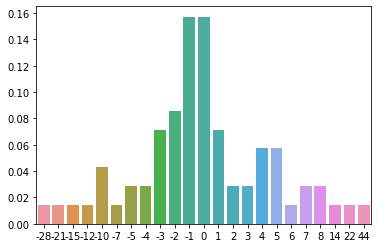

In [4]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm

filename_nhgis_block = 'guernsey/nhgis/guernsey_nhgis_tract.csv'
nhgis_block = pd.read_csv(filename_nhgis_block)

hist1_nhgis = nhgis_block[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
hist1_nhgis = hist1_nhgis.rename(columns={'H72003_sf': '1', 'H72004_sf': '2', 'H72005_sf': '3', 'H72006_sf': '4', 'H72007_sf': '5', 'H72008_sf': '6', 
                                          'H72009_sf': '7'})
hist2_nhgis = nhgis_block[['H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp']]
hist2_nhgis = hist2_nhgis.rename(columns={'H72003_dp': '1', 'H72004_dp': '2', 'H72005_dp': '3', 'H72006_dp': '4', 'H72007_dp': '5', 'H72008_dp': '6', 
                                          'H72009_dp': '7'})

noise = hist2_nhgis - hist1_nhgis

probabilities = noise.stack().value_counts(normalize=True)    
sns.barplot(probabilities.index, probabilities.values)

data = noise.values.ravel()
mu, std = norm.fit(data)
print(mu, std)